# **방학세미나 [ 2팀 ]**

멤버 : 김현우 이민호 이신영 신민서 윤예빈 이승연

기간 : 25.01.13 ~ 25.01.17

In [1]:
import warnings
warnings.filterwarnings('ignore')

# **0. 함수 정의**

In [34]:
# 전체 데이터에서 해당 변수의 비율을 출력하는 함수
def ratio(*args):
  _df = args[0]
  _obj = args[1:]
  if isinstance(args[1], list):
    _obj = args[1]
  for colname in _obj:
    cntDict = {}
    rowLength = len(_df[colname])
    for value in _df[colname]:
      if cntDict.get(str(value)) == None:
        cntDict[str(value)] = 1
      else:
        cntDict[str(value)] += 1
    print(f"{colname}")
    if len(cntDict.keys()) > 20:
      print(len(colname) * " " + '연속형 변수입니다.')
      _na = _df[colname].isna().sum()
      print(len(colname) * " " + 'nan : ' + str(_na) + f' ({_na / rowLength * 100:.2f}%)')
    else:
      for key, value in sorted(cntDict.items(), key=lambda x: str(x[0])):
        print(len(colname) * " " + f"{key} : {value} ({value / rowLength * 100:.2f}%)")

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(df, title=None):
  correlation_matrix = df.corr(numeric_only=True)

  plt.figure(figsize=(36, 30))
  sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
  if title != None:
    plt.title(title, fontsize=16)
  else:
    plt.title("Heatmap", fontsize=16)
  plt.show()

# **1. 데이터 로드**

In [36]:
# Google Drive와 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
%cd /content/drive/MyDrive/[25-1] 방학세미나

/content/drive/MyDrive/[25-1] 방학세미나


### **1-1. Train**

In [57]:
import pandas as pd

train = pd.read_csv('train.csv')
train

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X26,X27,X28,X29,X30,X31,X32,X33,X34,Y
0,0,70.32996,female,SJ,2,12.0,$25-$50k,37.0,65043.0,21.000000,...,0.899902,139.0,NaN,124.0,18.0,1660.0,NaN,1.0,1.000000,4
1,1,70.54895,female,CCC,3,NaN,under $11k,0.0,14419.0,14.500000,...,2.199707,138.0,7.359375,183.0,71.0,5380.0,0.0,1.0,1.000000,3
2,2,39.48798,female,SJ,2,NaN,NaN,44.0,321392.0,52.000000,...,1.599854,150.0,7.449219,NaN,NaN,NaN,NaN,5.0,5.000000,1
3,3,39.79700,male,CCC,3,14.0,under $11k,0.0,5901.0,12.000000,...,0.699951,130.0,7.479492,245.0,18.0,NaN,1.0,1.0,1.000000,3
4,4,74.90997,female,CCC,1,16.0,NaN,0.0,8166.0,8.000000,...,0.799927,142.0,7.399414,NaN,NaN,NaN,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,6159,57.35199,male,AM,1,12.0,$25-$50k,9.0,5977.0,11.000000,...,1.500000,133.0,7.479492,NaN,NaN,NaN,NaN,NaN,2.203613,3
6160,6160,46.06699,male,SJ,1,16.0,$25-$50k,0.0,25496.0,14.000000,...,0.599976,137.0,NaN,96.0,11.0,2220.0,0.0,0.0,0.000000,3
6161,6161,85.85596,male,CCC,1,NaN,NaN,0.0,10144.0,14.500000,...,3.000000,140.0,7.289062,NaN,NaN,NaN,5.0,3.0,3.000000,1
6162,6162,68.39996,male,SJ,2,NaN,NaN,0.0,45859.0,13.666664,...,1.399902,132.0,7.329102,165.0,10.0,6990.0,NaN,0.0,0.000000,1


### **1-2. Test**

In [58]:
test = pd.read_csv('test.csv')
test

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34
0,0,52.13998,female,SJ,6,14.0,under $11k,0.0,NaN,16.666656,...,0.199982,5.299805,140.0,7.479492,NaN,NaN,NaN,NaN,6.0,6.000000
1,1,63.34000,male,SJ,5,7.0,under $11k,0.0,13169.000,16.500000,...,1.000000,1.199951,136.0,7.399414,NaN,NaN,NaN,0.0,0.0,0.000000
2,2,83.21997,male,SJ,1,NaN,NaN,0.0,118611.438,33.000000,...,27.000000,5.399414,152.0,7.379883,NaN,NaN,NaN,NaN,NaN,2.294434
3,3,55.42499,female,AM,1,13.0,NaN,0.0,10085.000,12.500000,...,0.899902,0.799927,128.0,NaN,NaN,NaN,NaN,NaN,NaN,3.220703
4,4,68.38898,female,CCC,5,11.0,NaN,0.0,26261.000,11.666664,...,0.899902,1.899902,143.0,7.519531,95.0,39.0,1975.0,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,1536,45.56598,male,SJ,3,18.0,$25-$50k,0.0,181701.000,51.000000,...,31.398438,4.799805,142.0,7.359375,NaN,NaN,NaN,NaN,0.0,0.000000
1537,1537,62.88300,female,CCC,2,NaN,under $11k,0.0,3748.000,7.000000,...,0.799927,1.599854,134.0,7.429688,100.0,30.0,5752.0,0.0,NaN,0.494751
1538,1538,77.52997,male,SJ,1,NaN,NaN,0.0,89850.000,50.000000,...,1.099854,0.899902,142.0,7.459961,103.0,12.0,NaN,NaN,0.0,0.000000
1539,1539,81.44598,female,SJ,1,10.0,NaN,44.0,63753.000,44.000000,...,2.799805,0.699951,127.0,7.409180,NaN,NaN,NaN,NaN,6.0,6.000000


# **2. 상관관계**

### **2-1. 상관관계 히트맵**

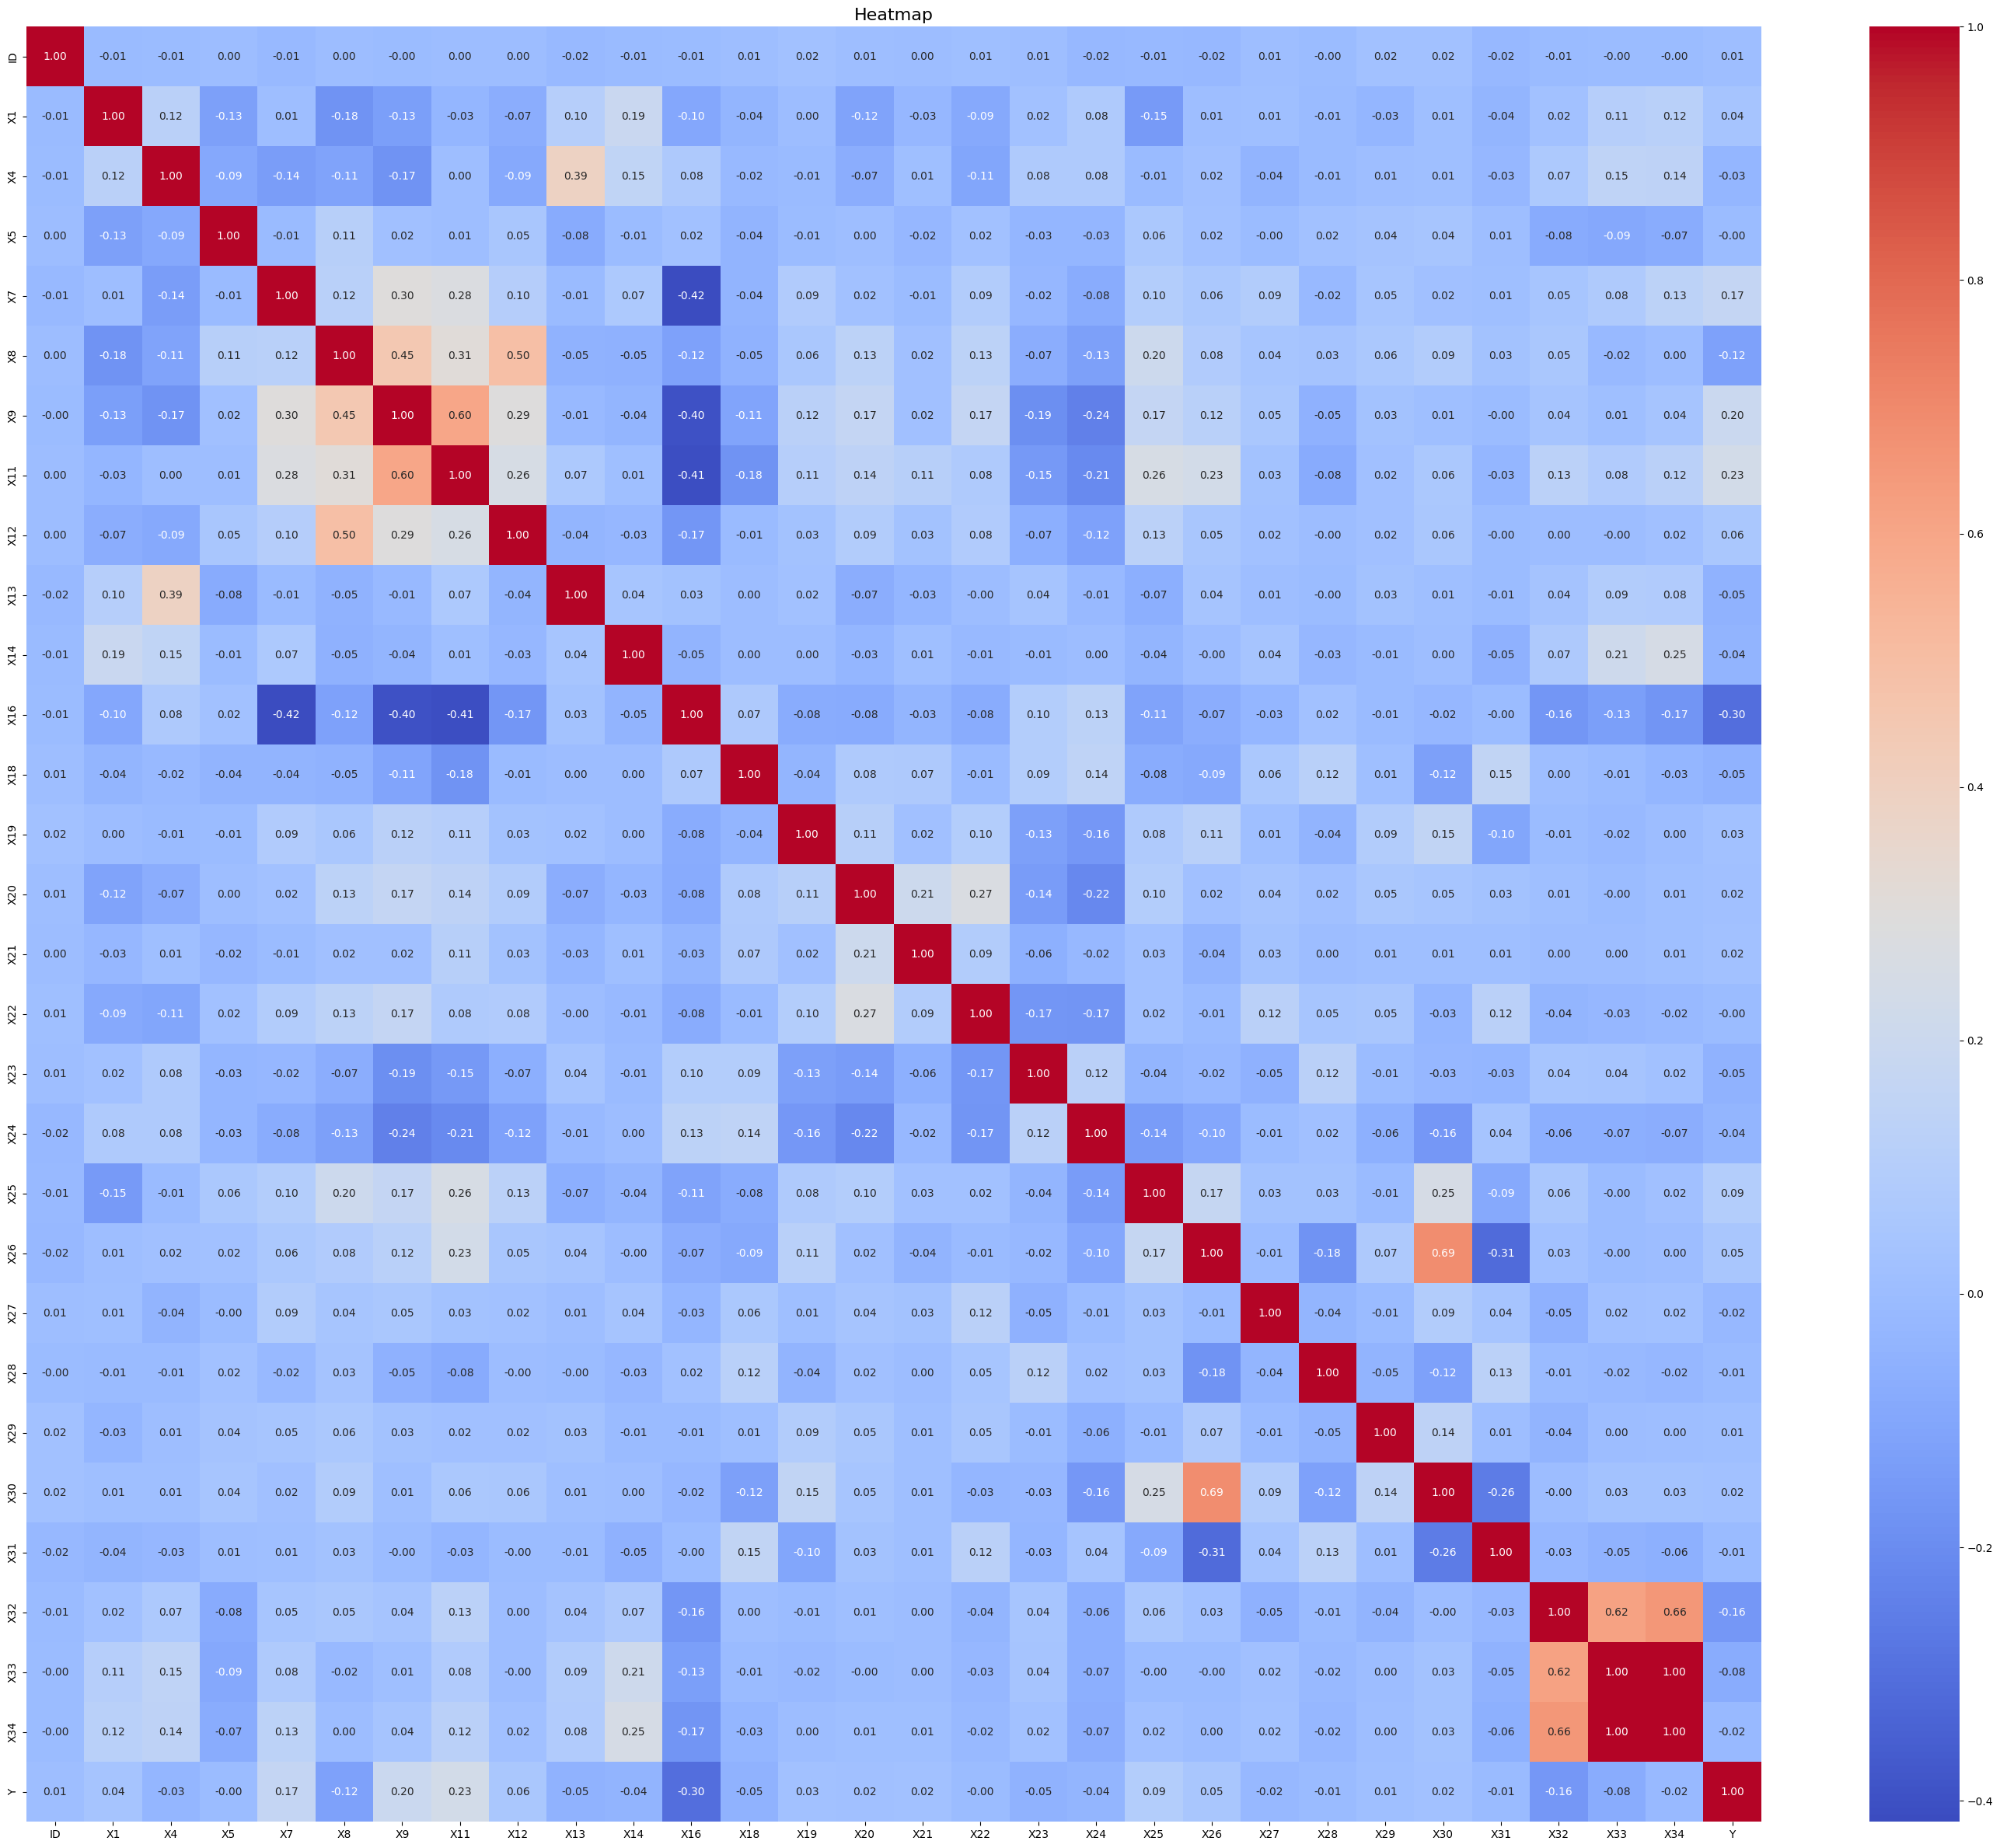

In [59]:
heatmap(train)

### **2-2. 결측치 분포**

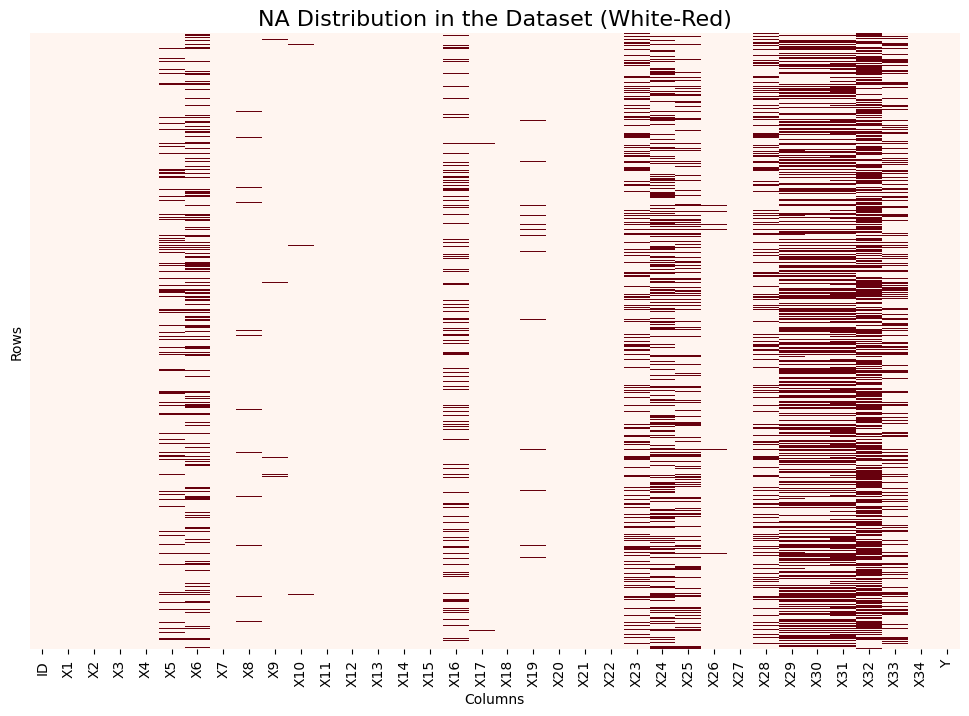

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title("NA Distribution in the Dataset (White-Red)", fontsize=16)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### **2-3. 결측치 상관관계 히트맵**

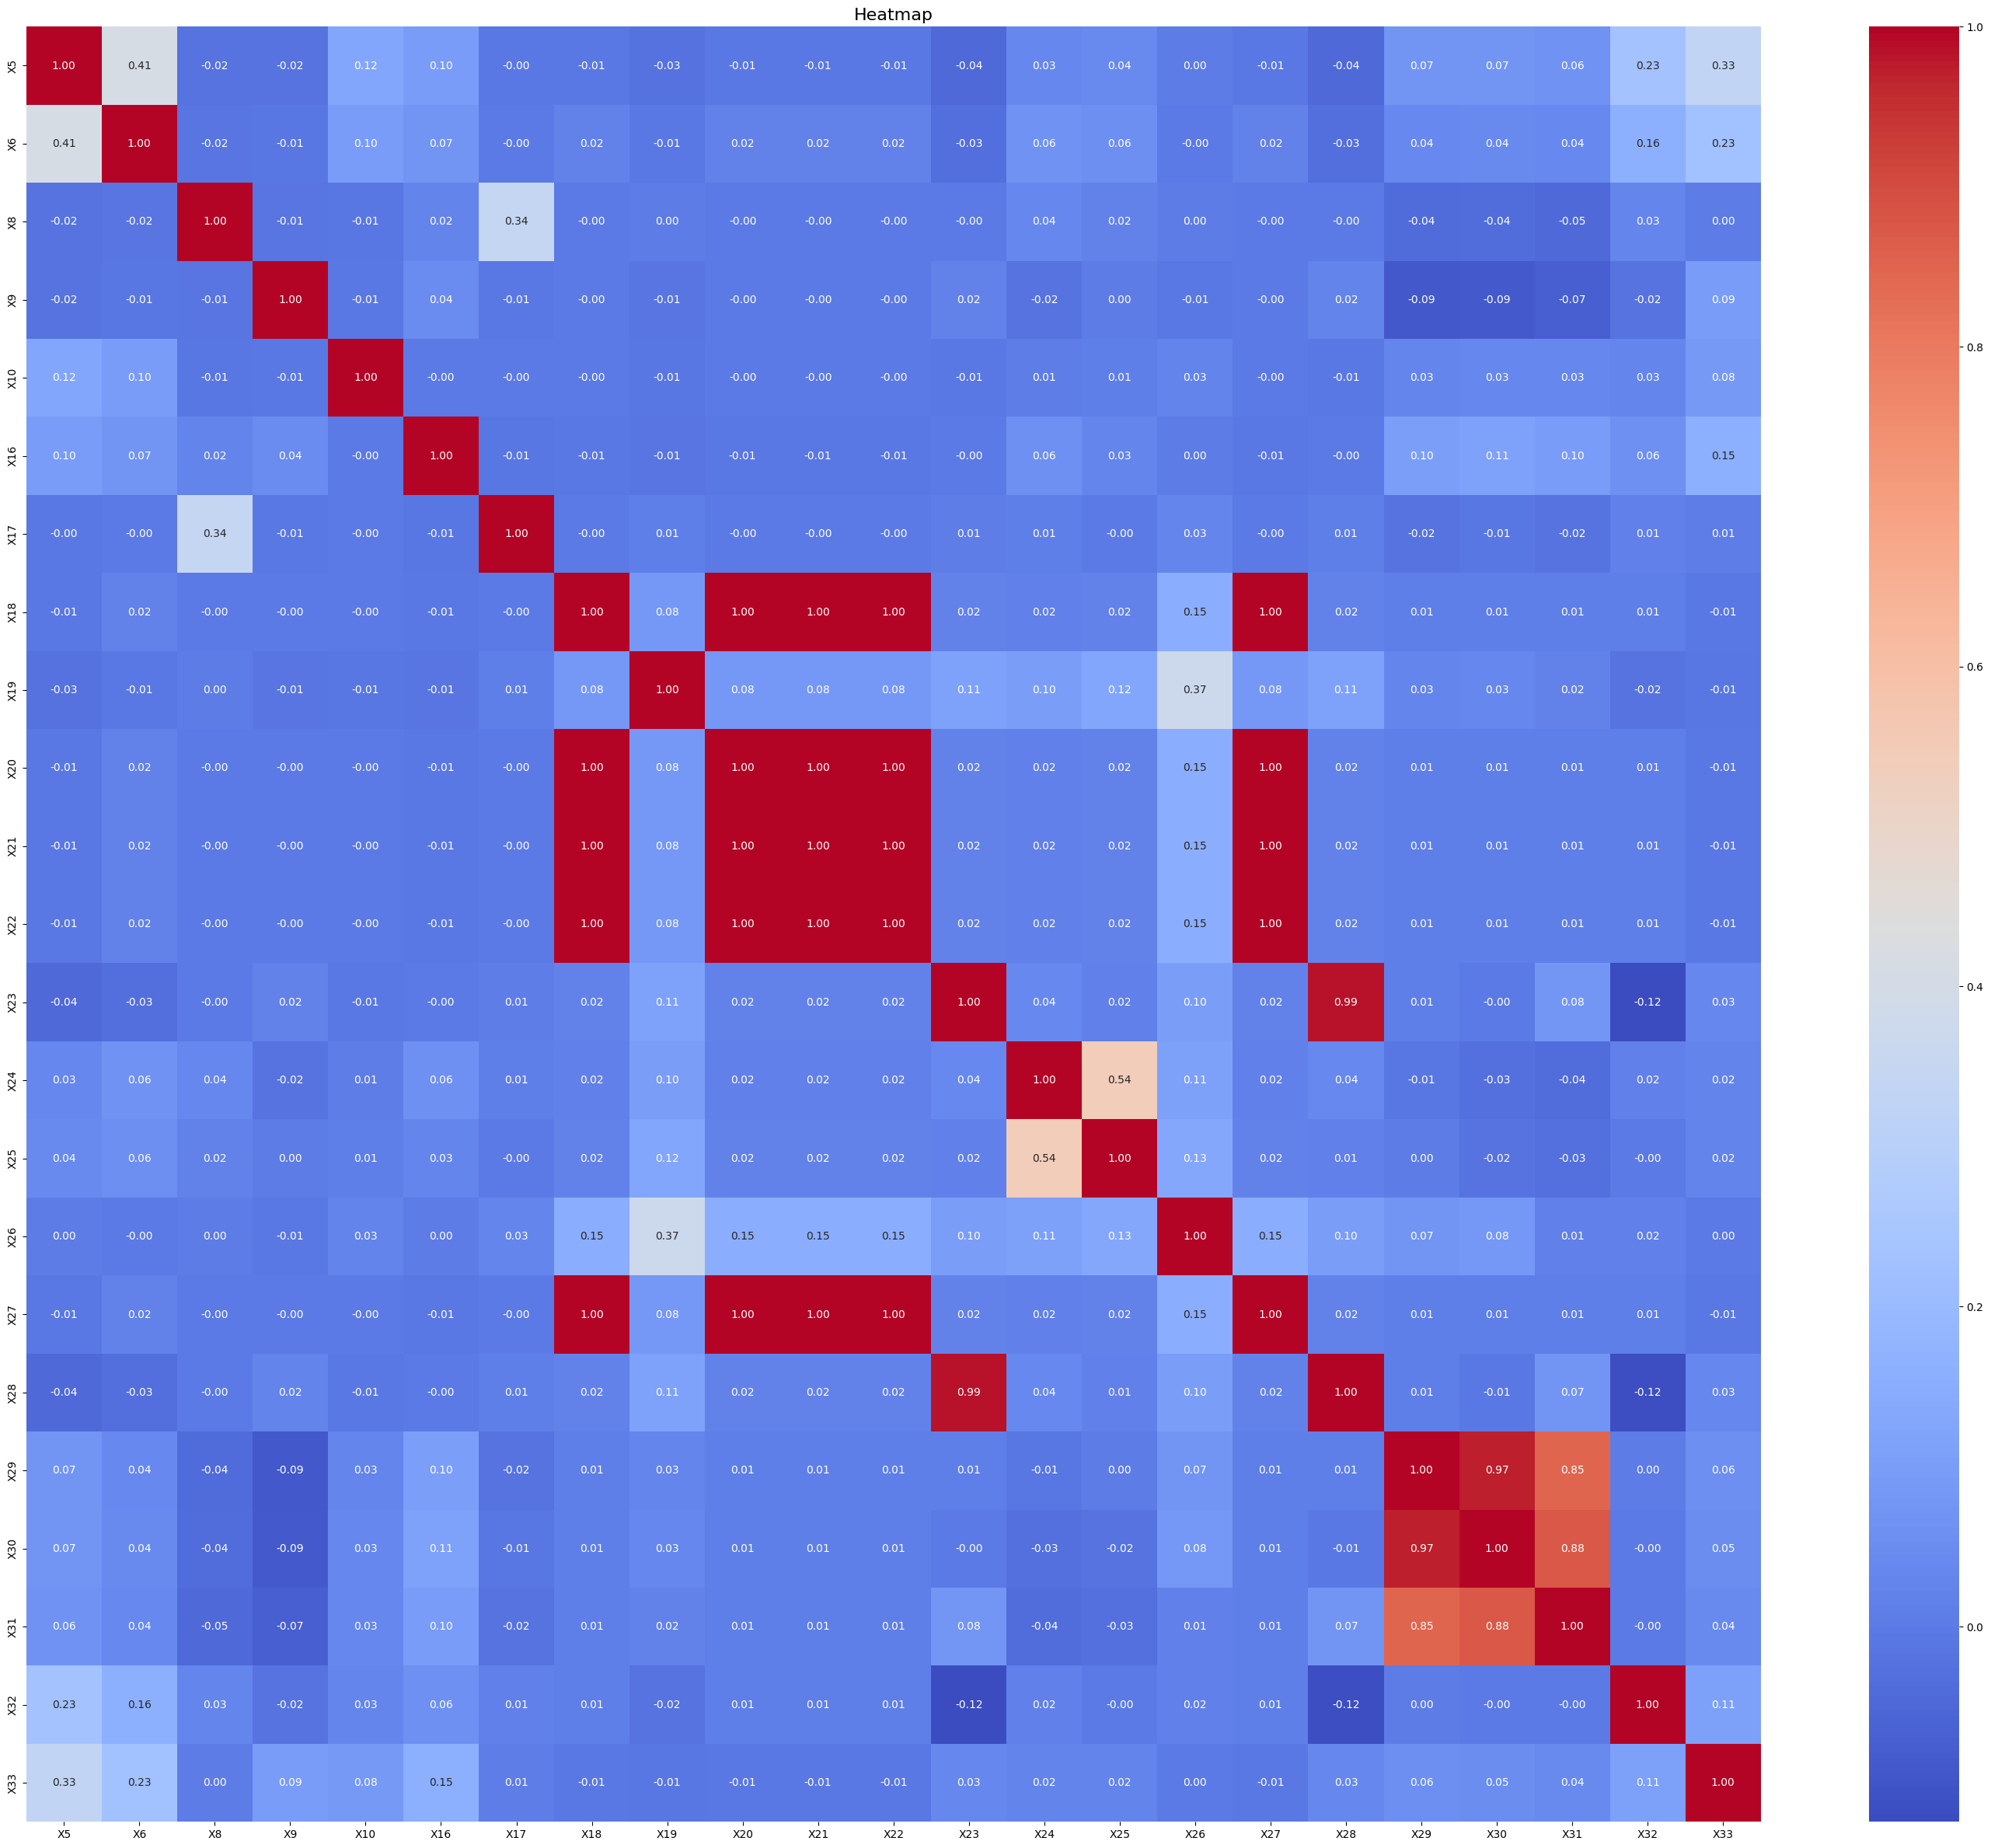

In [61]:
na_columns = train.columns[train.isnull().any()].tolist()
na_dict = {}
for col in na_columns:
  na_dict[col] = train[col].isna()
df_isna = pd.DataFrame(na_dict).astype(int)

heatmap(df_isna)

#### **2-3-1. 그룹1 : X23, X28**

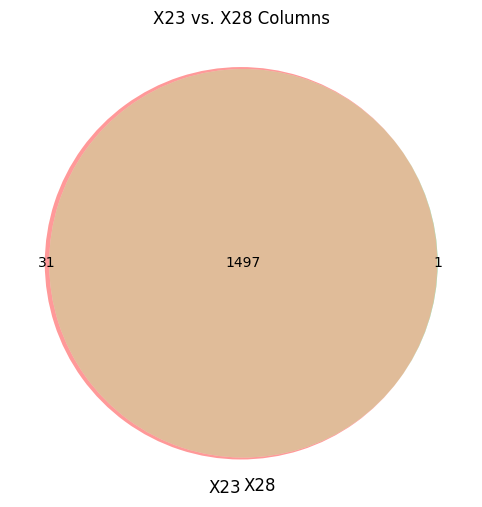

In [62]:
from matplotlib_venn import venn2

idx_x23_na = set(list(train[train['X23'].isna()].index))
idx_x28_na = set(list(train[train['X28'].isna()].index))

plt.figure(figsize=(8, 6))
venn = venn2([idx_x23_na, idx_x28_na], ('X23', 'X28'))
plt.title("X23 vs. X28 Columns")
plt.show()

#### **2-3-2. 그룹2 : X29, X30, X31**

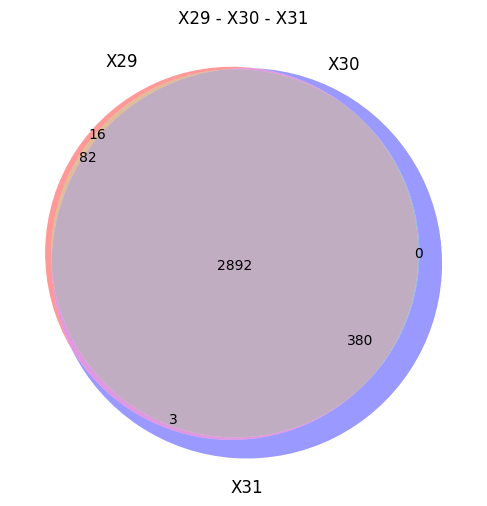

In [63]:
from matplotlib_venn import venn3

idx_x29_na = set(list(train[train['X29'].isna()].index))
idx_x30_na = set(list(train[train['X30'].isna()].index))
idx_x31_na = set(list(train[train['X31'].isna()].index))

plt.figure(figsize=(8, 6))
venn = venn3([idx_x29_na, idx_x30_na, idx_x31_na], ('X29', 'X30', 'X31'))
plt.title("X29 - X30 - X31")
plt.show()

# **3. 데이터 전처리**

### **3-1. ID 제거**

In [64]:
train.drop('ID', axis=1, inplace = True)
test.drop('ID', axis=1, inplace = True)

train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X26,X27,X28,X29,X30,X31,X32,X33,X34,Y
0,70.32996,female,SJ,2,12.0,$25-$50k,37.0,65043.0,21.000000,white,...,0.899902,139.0,NaN,124.0,18.0,1660.0,NaN,1.0,1.000000,4
1,70.54895,female,CCC,3,NaN,under $11k,0.0,14419.0,14.500000,white,...,2.199707,138.0,7.359375,183.0,71.0,5380.0,0.0,1.0,1.000000,3
2,39.48798,female,SJ,2,NaN,NaN,44.0,321392.0,52.000000,black,...,1.599854,150.0,7.449219,NaN,NaN,NaN,NaN,5.0,5.000000,1
3,39.79700,male,CCC,3,14.0,under $11k,0.0,5901.0,12.000000,white,...,0.699951,130.0,7.479492,245.0,18.0,NaN,1.0,1.0,1.000000,3
4,74.90997,female,CCC,1,16.0,NaN,0.0,8166.0,8.000000,white,...,0.799927,142.0,7.399414,NaN,NaN,NaN,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,57.35199,male,AM,1,12.0,$25-$50k,9.0,5977.0,11.000000,white,...,1.500000,133.0,7.479492,NaN,NaN,NaN,NaN,NaN,2.203613,3
6160,46.06699,male,SJ,1,16.0,$25-$50k,0.0,25496.0,14.000000,hispanic,...,0.599976,137.0,NaN,96.0,11.0,2220.0,0.0,0.0,0.000000,3
6161,85.85596,male,CCC,1,NaN,NaN,0.0,10144.0,14.500000,white,...,3.000000,140.0,7.289062,NaN,NaN,NaN,5.0,3.0,3.000000,1
6162,68.39996,male,SJ,2,NaN,NaN,0.0,45859.0,13.666664,white,...,1.399902,132.0,7.329102,165.0,10.0,6990.0,NaN,0.0,0.000000,1


### **3-2. 시각화 기반 Single Imputation**

#### **3-2-1. Median (X5, X7, X9, X18 ~ X24, X26, X27, X28)**

In [65]:
# 'X5', 'X7', 'X9', 'X11', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28'의 결측치 median으로 보간
var_median = ['X5', 'X7', 'X9', 'X11', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28']

for var in var_median:
  train[var] = train[var].fillna(train[var].median())
  test[var] = test[var].fillna(train[var].median())

#### **3-2-2. Mode (X10, X17)**

In [66]:
# X10, X17의 결측치 mode로 보간
var_mode = ['X10', 'X17']

for var in var_mode:
  train[var] = train[var].fillna(train[var].mode()[0])
  test[var] = test[var].fillna(train[var].mode()[0])

#### **3-2-3. Round (X33)**

In [67]:
# X33의 결측치 X34의 반올림 값으로 보간
train['X33'] = train['X33'].fillna(train['X34'].round())
test['X33'] = test['X33'].fillna(test['X34'].round())

train.drop(['X34'], axis=1, inplace=True)
test.drop(['X34'], axis=1, inplace=True)

### **3-3. Multiple Imputation**

모델 생성을 위해서 우선 결측치가 삭제된 데이터 준비

In [68]:
train1 = train.copy()

#X6 결측치 drop
train1 = train1.dropna(subset=['X6'])
#X5 결측치 drop
train1 = train1.dropna(subset=['X5'])
#X10 결측치 drop
train1 = train1.dropna(subset=['X10'])

train['X6'].replace({'under $11k' : 0, '$11-$25k' : 1, '$25-$50k' : 2, '>$50k' : 3}, inplace = True)
train1['X6'].replace({'under $11k' : 0, '$11-$25k' : 1, '$25-$50k' : 2, '>$50k' : 3}, inplace = True)

#### **3-3-1. AIC, BIC 확인**

어떤 모델을 사용할 것인가에 대한 확인 작업 (AIC. BIC 비교)

In [69]:
import pandas as pd
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel
from tqdm import tqdm

train1['X6'] = train1['X6'].astype('category')  # 소득
train1['X5'] = train1['X5'].astype('category')  # 교육수준
train1['X10'] = train1['X10'].astype('category')  # 인종

# 1. 인종만 포함한 모델
X_race = pd.get_dummies(train1['X10'], drop_first=True)
with tqdm(total=1, desc="Fitting Race Only Model") as pbar:
    model_race = OrderedModel(train1['X6'].cat.codes, X_race, distr='logit').fit(method='bfgs')
    pbar.update(1)
aic_race = model_race.aic
bic_race = model_race.bic
print("=== Race Only Model ===")
print(f"AIC: {aic_race}, BIC: {bic_race}\n")

# 2. 교육만 포함한 모델
X_education = pd.get_dummies(train1['X5'], drop_first=True)
with tqdm(total=1, desc="Fitting Education Only Model") as pbar:
    model_education = OrderedModel(train1['X6'].cat.codes, X_education, distr='logit').fit(method='bfgs')
    pbar.update(1)
aic_education = model_education.aic
bic_education = model_education.bic
print("=== Education Only Model ===")
print(f"AIC: {aic_education}, BIC: {bic_education}\n")

# 3. 인종과 교육 포함한 모델
X_race_education = pd.concat([X_race, X_education], axis=1)
with tqdm(total=1, desc="Fitting Race & Education Model") as pbar:
    model_race_education = OrderedModel(train1['X6'].cat.codes, X_race_education, distr='logit').fit(method='bfgs')
    pbar.update(1)
aic_race_education = model_race_education.aic
bic_race_education = model_race_education.bic
print("=== Race & Education Model ===")
print(f"AIC: {aic_race_education}, BIC: {bic_race_education}\n")

# 1, 2, 3 모델 AIC/BIC 비교
results = pd.DataFrame({
    'Model': ['Race Only', 'Education Only', 'Race & Education'],
    'AIC': [aic_race, aic_education, aic_race_education],
    'BIC': [bic_race, bic_education, bic_race_education]
})


Fitting Race Only Model: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


Optimization terminated successfully.
         Current function value: 1.212701
         Iterations: 43
         Function evaluations: 44
         Gradient evaluations: 44
=== Race Only Model ===
AIC: 10690.618729412061, BIC: 10735.347429246665



Fitting Education Only Model:   0%|          | 0/1 [00:00<?, ?it/s]

Optimization terminated successfully.
         Current function value: 1.115394
         Iterations: 258
         Function evaluations: 260
         Gradient evaluations: 260


Fitting Education Only Model: 100%|██████████| 1/1 [00:27<00:00, 27.33s/it]


=== Education Only Model ===
AIC: 9883.92583281026, BIC: 10088.399889197026



Fitting Race & Education Model:   0%|          | 0/1 [00:00<?, ?it/s]

Optimization terminated successfully.
         Current function value: 1.095584
         Iterations: 281
         Function evaluations: 283
         Gradient evaluations: 283


Fitting Race & Education Model: 100%|██████████| 1/1 [00:38<00:00, 38.09s/it]

=== Race & Education Model ===
AIC: 9717.518936056334, BIC: 9947.552249491446



#### **3-3-2. Interaction term 여부 확인 (LRT)**

In [70]:
from statsmodels.formula.api import glm
import statsmodels.api as sm
from scipy.stats import chi2
from tqdm import tqdm

# 데이터 준비
train1['X6'] = train1['X6'].astype('category')  # 소득
train1['X5'] = train1['X5'].astype('category')  # 교육수준
train1['X10'] = train1['X10'].astype('category')  # 인종

# 교차표 생성 (X6, X5, X10의 빈도 계산)
cross_tab = train1.groupby(['X6', 'X5', 'X10']).size().reset_index(name='count')

# 교차표 데이터 준비
cross_tab['X6'] = cross_tab['X6'].astype('category')
cross_tab['X5'] = cross_tab['X5'].astype('category')
cross_tab['X10'] = cross_tab['X10'].astype('category')

# 1. 독립 모델 (교육수준과 인종 독립 가정)
formula_independent = 'count ~ X6 + X5 + X10'
with tqdm(total=1, desc="Fitting Independent Model") as pbar:
    model_independent = glm(formula_independent, data=cross_tab, family=sm.families.Poisson()).fit()
    pbar.update(1)

# 2. 상호작용 모델 (교육수준과 인종의 상호작용 포함)
formula_interaction = 'count ~ X6 + X5 * X10'
with tqdm(total=1, desc="Fitting Interaction Model") as pbar:
    model_interaction = glm(formula_interaction, data=cross_tab, family=sm.families.Poisson()).fit()
    pbar.update(1)

# 3. 모델 비교 (독립 모델 vs 상호작용 모델)
print("=== Independent Model Summary ===")
print(model_independent.summary())
print("\n=== Interaction Model Summary ===")
print(model_interaction.summary())

# 모델 비교: Likelihood Ratio Test (LRT)
lrt_statistic = 2 * (model_interaction.llf - model_independent.llf)
df_diff = model_interaction.df_model - model_independent.df_model
p_value = chi2.sf(lrt_statistic, df_diff)  # scipy.stats.chi2.sf 사용

print("\nLikelihood Ratio Test:")
print(f"LRT Statistic: {lrt_statistic:.3f}")
print(f"Degrees of Freedom Difference: {df_diff}")
print(f"p-value: {p_value:.3f}")

# 결론 도출
if p_value < 0.05:
    print("\n결론: 상호작용 효과가 유의미합니다. 상호작용 모델을 사용하는 것이 적합합니다.")
else:
    print("\n결론: 상호작용 효과가 유의하지 않습니다. 독립 모델을 사용하는 것이 적합합니다.")


Fitting Interaction Model: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

=== Independent Model Summary ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  600
Model:                            GLM   Df Residuals:                      563
Model Family:                 Poisson   Df Model:                           36
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1289.0
Date:                Fri, 17 Jan 2025   Deviance:                       1800.6
Time:                        14:09:06   Pearson chi2:                 2.41e+03
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercep

#### **3-3-3. X6, x10 결측치 보간**

X5, X10 결측치 기존 EDA 대로 보간

In [71]:
train['X5'] = train['X5'].fillna(train['X5'].median())
train['X10'] = train['X10'].fillna('white')

In [72]:
train['X6'] = train['X6'].astype('category')  # 소득
train['X5'] = train['X5'].astype('category')  # 교육수준
train['X10'] = train['X10'].astype('category')  # 인종

In [73]:
categories = [0, 1, 2, 3]

In [74]:
# train 데이터의 범주를 train1과 동일하게 정렬
train['X10'] = pd.Categorical(
    train['X10'],
    categories=['asian', 'black', 'hispanic', 'other', 'white'],
    ordered=False
)

train['X5'] = pd.Categorical(train['X5'], categories=train1['X5'].cat.categories, ordered=False)

# X6 범주 순서 지정
train['X6'] = pd.Categorical(
    train['X6'],
    # categories=['$11-$25k', '$25-$50k', '>$50k', 'under $11k'],
    categories=[0, 1, 2, 3],
    ordered=True
)

# 모델 예측 수행
missing_X6 = train[train['X6'].isna()]
missing_X6['X6_pred'] = model_interaction.predict(missing_X6)
missing_X6_test = test[test['X6'].isna()]
missing_X6_test['X6_pred'] = model_interaction.predict(missing_X6_test)

# 확률값에서 가장 가능성 높은 카테고리를 선택
missing_X6['X6_pred_class'] = missing_X6['X6_pred'].apply(
    lambda x: categories[np.argmax(x)]
)
missing_X6_test['X6_pred_class'] = missing_X6_test['X6_pred'].apply(
    lambda x: categories[np.argmax(x)]
)

# 예측값을 train 데이터에 반영
train.loc[train['X6'].isna(), 'X6'] = missing_X6['X6_pred_class']
test.loc[test['X6'].isna(), 'X6'] = missing_X6_test['X6_pred_class']

train['X5'] = train['X5'].astype('float')
train['X6'] = train['X6'].astype('object')
train['X10'] = train['X10'].astype('object')

### **3-4. 범주형 변수 처리**

In [75]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding을 위한 함수 정의
def label_encode_object_columns(df):
    label_encoders = {}  # 각 열에 대해 LabelEncoder 객체를 저장
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # 문자열로 변환 후 Label Encoding
        label_encoders[col] = le  # LabelEncoder 객체 저장 (필요 시 디코딩 가능)
    return df, label_encoders

# train 데이터에 대해 Label Encoding 수행
train_encoded, _ = label_encode_object_columns(train)
train = train_encoded

test_encoded, _ = label_encode_object_columns(test)
test = test_encoded

# **4. MICE**

In [76]:
!pip install fancyimpute

In [78]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import joblib
from tqdm import tqdm
import time

var_exclude = ['X2', 'Y']
var_list = [column for column in list(train.columns) if column not in var_exclude]

imputer = IterativeImputer(
    estimator=RandomForestRegressor(random_state=0),
    random_state=0,
    max_iter=10
)

for _ in tqdm(range(1), desc="Fitting IterativeImputer"):
    imputer.fit(train.drop(var_exclude, axis=1))

imputed_array = imputer.transform(train.drop(var_exclude, axis=1))
imputed_df = pd.DataFrame(imputed_array, columns=train.drop(var_exclude, axis=1).columns)

result = imputed_df[['X8', 'X16', 'X25', 'X29', 'X30', 'X31', 'X32']]

In [80]:
train[['X8', 'X16', 'X25', 'X29', 'X30', 'X31', 'X32']] = result[['X8', 'X16', 'X25', 'X29', 'X30', 'X31', 'X32']]

In [81]:
train.to_csv('train(mice).csv', index=False)

In [82]:
# Test 데이터 결측치 보간
imputed_array_test = imputer.transform(test.drop(['X2'], axis=1))
imputed_df_test = pd.DataFrame(imputed_array_test, columns=test.drop(['X2'], axis=1).columns)

# 보간된 데이터를 저장
result_test = imputed_df_test[['X8', 'X16', 'X25', 'X29', 'X30', 'X31', 'X32']]

In [83]:
test[['X8', 'X16', 'X25', 'X29', 'X30', 'X31', 'X32']] = result_test[['X8', 'X16', 'X25', 'X29', 'X30', 'X31', 'X32']]

In [84]:
test.to_csv('test(mice).csv', index=False)

# **5. RFE CV**

In [85]:
train = pd.read_csv('train(mice).csv')

사용할 데이터를 object_classification에 저장하기

In [86]:
object_classification = train

Y 클래스 비율을 유지한 상태로 train, test 데이터로 split

In [87]:
from sklearn.model_selection import train_test_split

X = object_classification.drop(columns=['Y'])  # 독립 변수
y = object_classification['Y']  # 타깃 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

CatBoostClassifier:
- 범주형 데이터에 강한 앙상블 모델로, 자동으로 범주형 변수를 인코딩하고 처리합니다.
- 데이터에 노이즈가 있더라도 안정적으로 변수 중요도를 평가할 수 있습니다.
비선형 관계를 효과적으로 학습하기 때문에 비선형 특성이 강한 데이터에서도 적합합니다.
- 학습 과정에서 과적합 방지를 위한 내부 메커니즘이 포함되어 있어 일반화 성능이 뛰어납니다.
- GPU 가속을 지원하므로, 대규모 데이터에서도 효율적으로 사용할 수 있습니다.

### **5-1. Score function 기준**

In [89]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [90]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
min_features_to_select = 1    # 최소 변수 개수 10개
step = 1                      # 변수 개수 1개씩 줄이며 교차검증

In [92]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.feature_selection import RFECV

# 사용자 정의 스코어 함수
def custom_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])
    FN_class4 = cm[4, :].sum() - cm[4, 4]  # Class 4 FN
    TP_class3 = cm[3, 3]  # Class 3 TP
    TP_class2 = cm[2, 2]  # Class 2 TP
    TP_class1 = cm[1, 1]  # Class 1 TP
    TP_class0 = cm[0, 0]  # Class 0 TP

    score = -10 * FN_class4 + 5 * TP_class3 + 100 * TP_class2 + 50 * TP_class1 + 300 * TP_class0
    return score

# Scorer 생성
custom_scorer = make_scorer(custom_score, greater_is_better=True)

selector = RFECV(clf, step=step, cv=10, min_features_to_select=min_features_to_select, scoring=custom_scorer)
selector = selector.fit(X_train, y_train)

In [94]:
# 선택된 변수들 확인
selected_columns = X_train.columns[selector.support_]
print(selected_columns)
len(selected_columns)

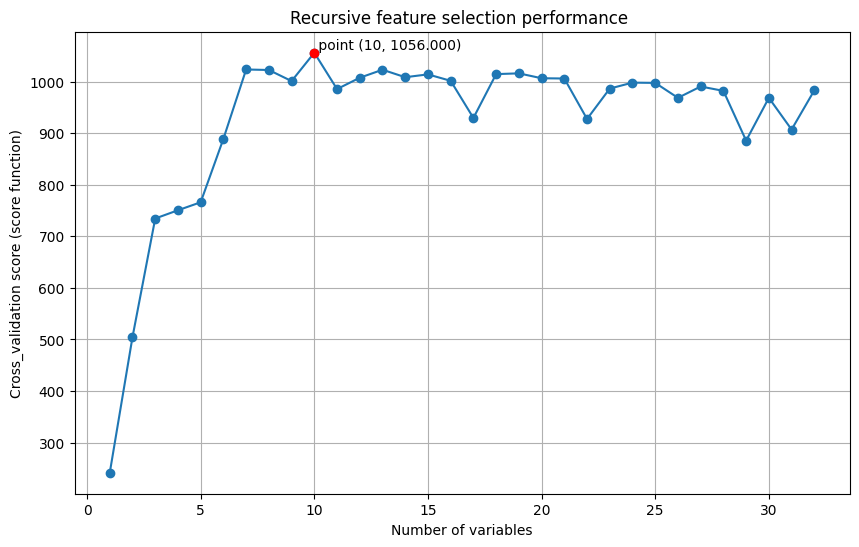

최종 선택된 특성의 개수:  10


In [ ]:
# RFECV 결과 시각화: 선택된 특성의 수
plt.figure(figsize=(10, 6))

# 축 설정 (x = 변수 개수, y = 교차검증 성능)
x_values = range(min_features_to_select, len(X_train.columns), step)
y_values = selector.cv_results_['mean_test_score'][:len(x_values)]

# 최고점 표시
max_score_idx = np.argmax(y_values)
max_score = y_values[max_score_idx]
max_x_value = x_values[max_score_idx]

# 그래프 그리기
plt.plot(x_values, y_values, marker='o')
plt.scatter(max_x_value, max_score, color='red', zorder=5)  # 최고점에 빨간 점 추가
plt.xlabel("Number of variables") # x축 이름
plt.ylabel("Cross_validation score (score function)") # y축 이름
plt.title("Recursive feature selection performance ") # plot 제목
plt.grid(True)

# 최고점 텍스트 추가
plt.text(max_x_value, max_score, f" point ({max_x_value}, {max_score:.3f})",
         horizontalalignment='left', verticalalignment='bottom', color='black')

plt.show()

# 최종 선택된 특성 수 출력
print("최종 선택된 특성의 개수: ", selector.n_features_)

### **5-2. Accuracy 기준**

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
min_features_to_select = 1    # 최소 변수 개수 10개
step = 1                      # 변수 개수 1개씩 줄이며 교차검증

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf, step=step, cv=10, min_features_to_select=min_features_to_select, scoring='accuracy')
selector = selector.fit(X_train, y_train)

In [ ]:
# 선택된 변수들 확인
selected_columns = X_train.columns[selector.support_]
print(selected_columns)
len(selected_columns)

Index(['X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X15', 'X16', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25',
       'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34'],
      dtype='object')


30

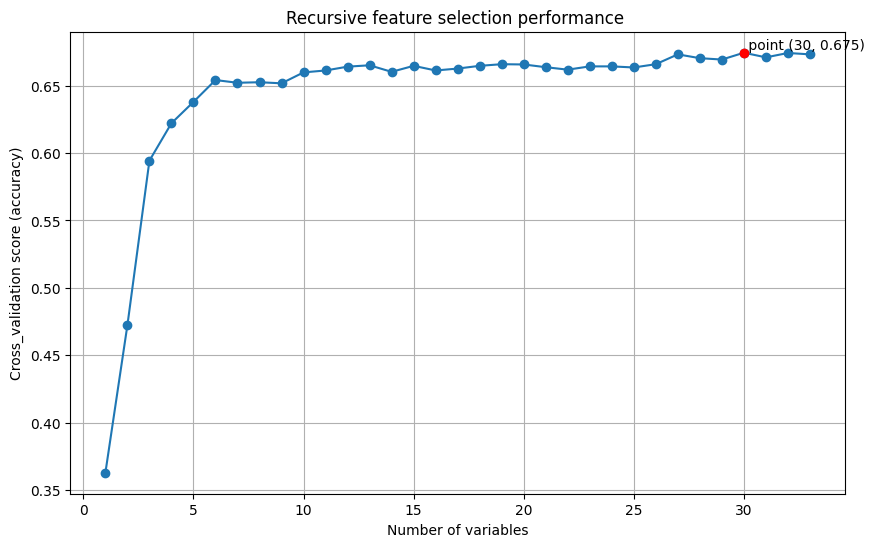

최종 선택된 특성의 개수:  30


In [ ]:
import numpy as np

# RFECV 결과 시각화: 선택된 특성의 수
plt.figure(figsize=(10, 6))

# 축 설정 (x = 변수 개수, y = 교차검증 성능)
x_values = range(min_features_to_select, len(X_train.columns), step)
y_values = selector.cv_results_['mean_test_score'][:len(x_values)]

# 최고점 표시
max_score_idx = np.argmax(y_values)
max_score = y_values[max_score_idx]
max_x_value = x_values[max_score_idx]

# 그래프 그리기
plt.plot(x_values, y_values, marker='o')
plt.scatter(max_x_value, max_score, color='red', zorder=5)  # 최고점에 빨간 점 추가
plt.xlabel("Number of variables") # x축 이름
plt.ylabel("Cross_validation score (accuracy)") # y축 이름
plt.title("Recursive feature selection performance ") # plot 제목
plt.grid(True)

# 최고점 텍스트 추가
plt.text(max_x_value, max_score, f" point ({max_x_value}, {max_score:.3f})",
         horizontalalignment='left', verticalalignment='bottom', color='black')

plt.show()

# 최종 선택된 특성 수 출력
print("최종 선택된 특성의 개수: ", selector.n_features_)

### **5-3. F1 score 기준**

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
min_features_to_select = 1    # 최소 변수 개수 10개
step = 1                      # 변수 개수 1개씩 줄이며 교차검증

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, f1_score

# 사용자 정의 F1 Scorer 생성
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# RFECV를 사용한 변수 선택
selector = RFECV(
    estimator=clf,
    step=1,
    cv=10,
    min_features_to_select=min_features_to_select,
    scoring=f1_weighted_scorer  # Weighted F1 스코어 사용
)

# 학습
selector = selector.fit(X_train, y_train)

In [ ]:
# 선택된 변수들 확인
selected_columns = X_train.columns[selector.support_]
print(selected_columns)
len(selected_columns)

Index(['X1', 'X3', 'X4', 'X5', 'X7', 'X8', 'X9', 'X11', 'X12', 'X15', 'X16',
       'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27',
       'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34'],
      dtype='object')


28

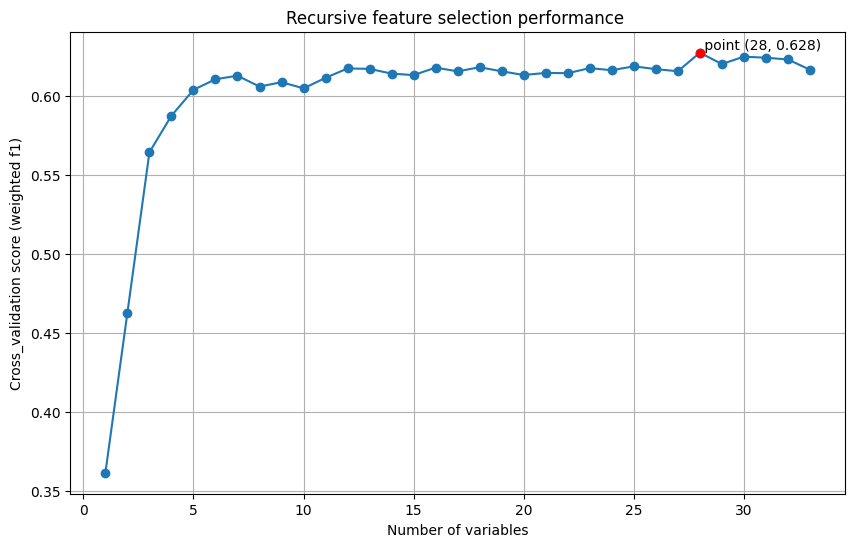

최종 선택된 특성의 개수:  28


In [ ]:
# RFECV 결과 시각화: 선택된 특성의 수
plt.figure(figsize=(10, 6))

# 축 설정 (x = 변수 개수, y = 교차검증 성능)
x_values = range(min_features_to_select, len(X_train.columns), step)
y_values = selector.cv_results_['mean_test_score'][:len(x_values)]

# 최고점 표시
max_score_idx = np.argmax(y_values)
max_score = y_values[max_score_idx]
max_x_value = x_values[max_score_idx]

# 그래프 그리기
plt.plot(x_values, y_values, marker='o')
plt.scatter(max_x_value, max_score, color='red', zorder=5)  # 최고점에 빨간 점 추가
plt.xlabel("Number of variables") # x축 이름
plt.ylabel("Cross_validation score (weighted f1)") # y축 이름
plt.title("Recursive feature selection performance ") # plot 제목
plt.grid(True)

# 최고점 텍스트 추가
plt.text(max_x_value, max_score, f" point ({max_x_value}, {max_score:.3f})",
         horizontalalignment='left', verticalalignment='bottom', color='black')

plt.show()

# 최종 선택된 특성 수 출력
print("최종 선택된 특성의 개수: ", selector.n_features_)

### **5-4. ROC - AUC 기준**

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
min_features_to_select = 1    # 최소 변수 개수 10개
step = 1                      # 변수 개수 1개씩 줄이며 교차검증

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
import numpy as np

# 사용자 정의 roc_auc_score 함수
def custom_roc_auc_score(estimator, X, y):
    # 클래스 확률 예측
    y_proba = estimator.predict_proba(X)
    # ROC-AUC 점수 계산 (multi_class='ovr')
    return roc_auc_score(y, y_proba, multi_class='ovr')

# RFECV 설정
selector = RFECV(
    estimator=clf,
    step=step,
    cv=10,
    min_features_to_select=min_features_to_select,
    scoring=custom_roc_auc_score  # 사용자 정의 함수 적용
)

# 학습
selector = selector.fit(X_train, y_train)

In [ ]:
# 선택된 변수들 확인
selected_columns = X_train.columns[selector.support_]
print(selected_columns)
len(selected_columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X15', 'X16', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33',
       'X34'],
      dtype='object')


32

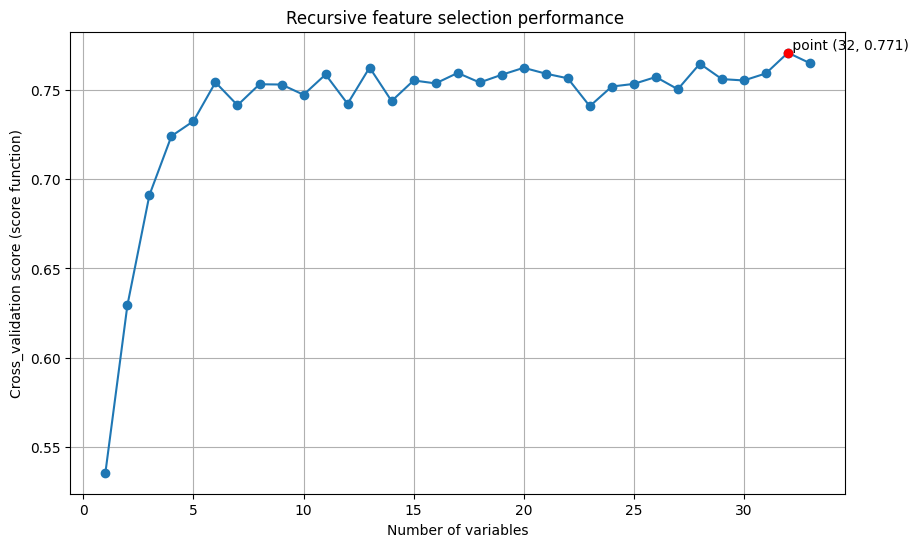

최종 선택된 특성의 개수:  32


In [ ]:
# RFECV 결과 시각화: 선택된 특성의 수
plt.figure(figsize=(10, 6))

# 축 설정 (x = 변수 개수, y = 교차검증 성능)
x_values = range(min_features_to_select, len(X_train.columns), step)
y_values = selector.cv_results_['mean_test_score'][:len(x_values)]

# 최고점 표시
max_score_idx = np.argmax(y_values)
max_score = y_values[max_score_idx]
max_x_value = x_values[max_score_idx]

# 그래프 그리기
plt.plot(x_values, y_values, marker='o')
plt.scatter(max_x_value, max_score, color='red', zorder=5)  # 최고점에 빨간 점 추가
plt.xlabel("Number of variables") # x축 이름
plt.ylabel("Cross_validation score (score function)") # y축 이름
plt.title("Recursive feature selection performance ") # plot 제목
plt.grid(True)

# 최고점 텍스트 추가
plt.text(max_x_value, max_score, f" point ({max_x_value}, {max_score:.3f})",
         horizontalalignment='left', verticalalignment='bottom', color='black')

plt.show()

# 최종 선택된 특성 수 출력
print("최종 선택된 특성의 개수: ", selector.n_features_)

# **6. 모델링 전 준비 단계**

Optuna 설치

In [95]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00


catboost 설치

In [96]:
!pip install catboost

Library 준비

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import optuna
import joblib
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

변수 선택 결과 (Score function 기준)와 학습에 사용할 데이터프레임 df

In [102]:
train = pd.read_csv('train(mice).csv')
test = pd.read_csv('test(mice).csv')

df = train[['X1', 'X3', 'X7', 'X8', 'X9', 'X11', 'X16', 'X22', 'X32', 'X33', 'Y']]
test = test[['X1', 'X3', 'X7', 'X8', 'X9', 'X11', 'X16', 'X22', 'X32', 'X33']]

# **7. 모델링 및 예측**

## **7-1. 데이터 분할**

In [103]:
import optuna
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib
import numpy as np

# 예제 데이터 준비
X = df.drop(columns=['Y'])
y = df['Y']

# Train-Test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## **7-2. 모델링 함수 정의**

In [104]:
from sklearn.metrics import confusion_matrix

def score_function(y_true, y_pred):
    # Confusion matrix 계산
    cm = confusion_matrix(y_true, y_pred)

    # TP, FN 추출
    FN_class4 = cm[4, :].sum() - cm[4, 4]  # Class 4 FN
    TP_class3 = cm[3, 3]  # Class 3 TP
    TP_class2 = cm[2, 2]  # Class 2 TP
    TP_class1 = cm[1, 1]  # Class 1 TP
    TP_class0 = cm[0, 0]  # Class 0 TP

    # 사용자 정의 점수 계산
    score = -10 * FN_class4 + 5 * TP_class3 + 100 * TP_class2 + 50 * TP_class1 + 300 * TP_class0
    return score

def optimize_model(trial, model_name):
    if model_name == 'xgboost':
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        }
        model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')

    elif model_name == 'catboost':
        params = {
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'iterations': trial.suggest_int('iterations', 50, 500),
        }
        model = CatBoostClassifier(**params, verbose=0)

    elif model_name == 'random_forest':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        }
        model = RandomForestClassifier(**params)

    elif model_name == 'lightgbm':
        params = {
            'num_leaves': trial.suggest_int('num_leaves', 31, 256),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        }
        model = lgb.LGBMClassifier(**params)

    else:
        raise ValueError("Invalid model name")

    model.fit(X_train_smote, y_train_smote)
    preds = model.predict(X_test)
    score = score_function(y_test, preds)
    return score

## **7-3. 학습 및 평가 (모델 저장)**

In [106]:
import optuna
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

# 사용자 정의 점수 계산 함수
def score_function(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    FN_class4 = cm[4, :].sum() - cm[4, 4]  # Class 4 FN
    TP_class3 = cm[3, 3]  # Class 3 TP
    TP_class2 = cm[2, 2]  # Class 2 TP
    TP_class1 = cm[1, 1]  # Class 1 TP
    TP_class0 = cm[0, 0]  # Class 0 TP
    score = -10 * FN_class4 + 5 * TP_class3 + 100 * TP_class2 + 50 * TP_class1 + 300 * TP_class0
    return score

# 클래스 가중치 계산
unique_classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=unique_classes, y=y_train)
class_weights = dict(zip(unique_classes, class_weights))

# Optuna 최적화 함수
def optimize_catboost(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 50, 500),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1, 10),
        "border_count": trial.suggest_int("border_count", 32, 255),
    }

    # CatBoostClassifier 초기화
    catboost = CatBoostClassifier(**params, class_weights=list(class_weights.values()), verbose=0, random_state=42)

    # SMOTE를 사용하여 클래스 불균형 해결
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # 모델 학습
    catboost.fit(X_train_smote, y_train_smote)

    # 예측 및 점수 계산
    preds = catboost.predict(X_test)
    score = score_function(y_test, preds)
    return score

# Optuna로 CatBoost 최적화
print("Optimizing CatBoost with Optuna...")
study = optuna.create_study(direction="maximize")
study.optimize(optimize_catboost, n_trials=50)

print(f"Best parameters for CatBoost: {study.best_params}")

# 최적의 하이퍼파라미터로 모델 구성
final_model = CatBoostClassifier(**study.best_params, class_weights=list(class_weights.values()), verbose=0, random_state=42)

# SMOTE를 사용하여 데이터 보강
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 최종 모델 학습
final_model.fit(X_train_smote, y_train_smote)

# 모델 평가: Classification Report
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)

print("\nClassification Report for CatBoost:")
print(classification_report(y_test, y_pred))

# ROC Curve 및 AUC 계산
y_test_bin = pd.get_dummies(y_test)
auc_scores = {}
for i, class_name in enumerate(y_test_bin.columns):
    auc_scores[class_name] = roc_auc_score(y_test_bin.iloc[:, i], y_pred_proba[:, i])

print("\nAUC Scores:")
for class_name, auc in auc_scores.items():
    print(f"Class {class_name}: {auc:.4f}")

# ROC Curve 시각화
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(y_test_bin.columns):
    fpr, tpr, _ = roc_curve(y_test_bin.iloc[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC: {auc_scores[class_name]:.4f})")

plt.title("ROC Curve for CatBoost", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# 모델 저장
joblib.dump(final_model, "catboost_model.pkl")
print("CatBoost model saved.")

## **7-4. 예측**

In [ ]:
test_ids = pd.read_csv('test_id.csv')["ID"]

In [ ]:
import joblib
import pandas as pd

# 저장된 CatBoost 모델 불러오기
model = joblib.load("catboost_model.pkl")

# 테스트 데이터 로드 (Y 없는 상태)
# test 데이터에는 'ID'와 train과 동일한 feature가 포함된 상태여야 함
X_test = test  # 'test'는 미리 정의된 테스트 데이터 프레임
test_ids = pd.read_csv('test_id.csv')["ID"]

# X_test의 ID 열을 제거하여 모델 예측에 필요한 feature만 남김
test_features = X_test.drop(columns=['ID'], errors='ignore')

# CatBoost 모델로 예측 수행
y_pred = model.predict(test_features)



In [ ]:
# 예측 결과가 1차원 배열이 아니라면, 이를 1차원으로 변환
y_pred = y_pred.ravel()

# 제출 파일 생성
submission = pd.DataFrame({
    'ID': test_ids,
    'Y': y_pred
})

# 제출 파일 저장
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'.")


Submission file saved as 'submission.csv'.


In [ ]:
submission.value_counts('Y')

,count
Y,
2,567
1,328
4,317
3,234
0,95
